In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cleared_dataset_dataco_supplychain.csv', encoding = 'ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Order Id                       180519 non-null  int64  
 1   Order Region                   180519 non-null  object 
 2   Order State                    180519 non-null  object 
 3   Product Status                 180519 non-null  int64  
 4   order date (DateOrders)        180519 non-null  object 
 5   Order Status                   180519 non-null  object 
 6   Customer Id                    180519 non-null  int64  
 7   Customer Segment               180519 non-null  object 
 8   Customer Country               180519 non-null  object 
 9   Customer State                 180519 non-null  object 
 10  Customer City                  180519 non-null  object 
 11  Department Name                180519 non-null  object 
 12  Latitude                      

In [5]:
datetime_val = datetime.strptime('2017-10-02 12:46:00', '%Y-%m-%d %H:%M:%S')
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
new_df = df[(df["order date (DateOrders)"]<=datetime_val)]

In [2]:
from datetime import datetime

In [6]:
new_df['Type'].value_counts()

Type
DEBIT       66113
TRANSFER    47589
PAYMENT     39828
CASH        18669
Name: count, dtype: int64

In [ ]:
new

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172199 entries, 48 to 180518
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Order Id                       172199 non-null  int64         
 1   Order Region                   172199 non-null  object        
 2   Order State                    172199 non-null  object        
 3   Product Status                 172199 non-null  int64         
 4   order date (DateOrders)        172199 non-null  datetime64[ns]
 5   Order Status                   172199 non-null  object        
 6   Customer Id                    172199 non-null  int64         
 7   Customer Segment               172199 non-null  object        
 8   Customer Country               172199 non-null  object        
 9   Customer State                 172199 non-null  object        
 10  Customer City                  172199 non-null  object        
 11  Depa

In [7]:
new_df['Order Status'].unique()

array(['PENDING_PAYMENT', 'PENDING', 'PROCESSING', 'ON_HOLD', 'COMPLETE',
       'SUSPECTED_FRAUD', 'CANCELED', 'PAYMENT_REVIEW', 'CLOSED'],
      dtype=object)

In [9]:
unique_order_status = df['Order Status'].unique()
df_unique_order_status = pd.DataFrame(unique_order_status, columns=['Unique Order Status'])
df_unique_order_status

,Unique Order Status
0,COMPLETE
1,PENDING
2,CLOSED
3,PENDING_PAYMENT
4,CANCELED
5,PROCESSING
6,SUSPECTED_FRAUD
7,ON_HOLD
8,PAYMENT_REVIEW


In [11]:
c_fraud = new_df[new_df['Order Status'] == 'SUSPECTED_FRAUD']

In [9]:
c_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3878 entries, 183 to 180490
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Order Id                       3878 non-null   int64         
 1   Order Region                   3878 non-null   object        
 2   Order State                    3878 non-null   object        
 3   Product Status                 3878 non-null   int64         
 4   order date (DateOrders)        3878 non-null   datetime64[ns]
 5   Order Status                   3878 non-null   object        
 6   Customer Id                    3878 non-null   int64         
 7   Customer Segment               3878 non-null   object        
 8   Customer Country               3878 non-null   object        
 9   Customer State                 3878 non-null   object        
 10  Customer City                  3878 non-null   object        
 11  Department Name   

In [7]:
3878/172199 *100

2.252045598406495

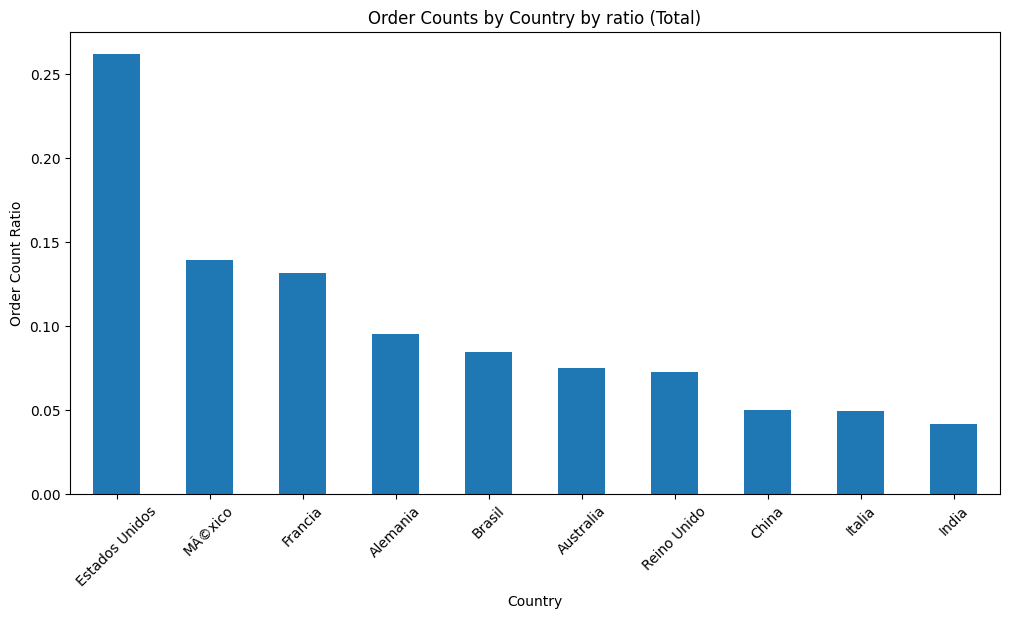

In [14]:
# 데이터프레임에서 'Order Country' 열의 값 카운트
country_counts_new = new_df['Order Country'].value_counts().head(10)

# 전체 주문 수 계산
total_orders = country_counts_new.sum()

# 비율 계산
country_ratios = country_counts_new / total_orders

# 막대 그래프 그리기
plt.figure(figsize=(12,6))
country_ratios.plot(kind='bar')
plt.title('Order Counts by Country by ratio (Total)')
plt.xlabel('Country')
plt.ylabel('Order Count Ratio')
plt.xticks(rotation=45)
plt.show()

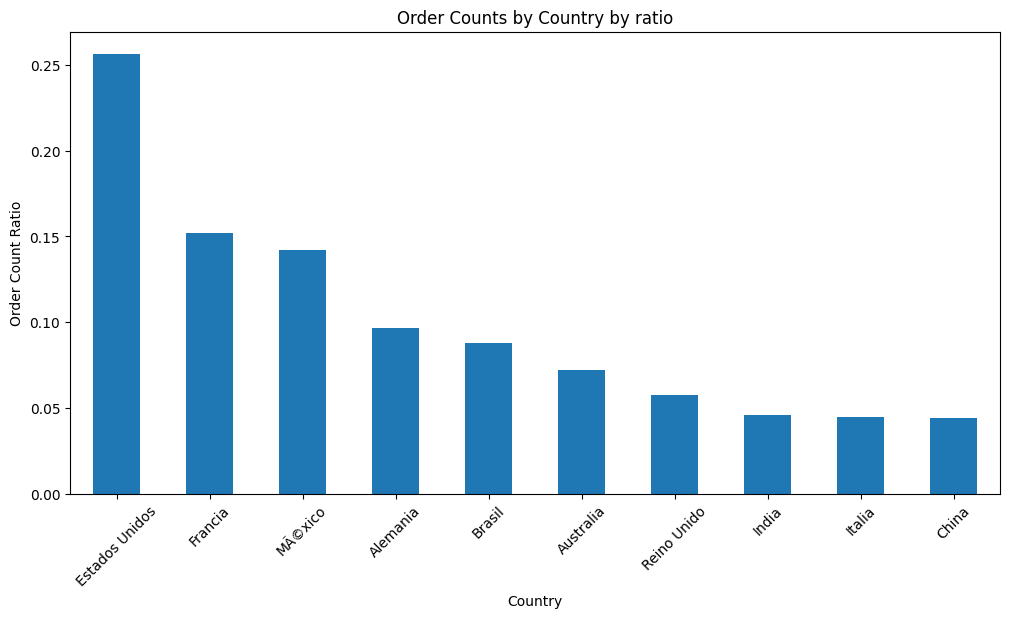

In [11]:
# 데이터프레임에서 'Order Country' 열의 값 카운트
country_counts = c_fraud['Order Country'].value_counts().head(10)

# 전체 주문 수 계산
total_orders = country_counts.sum()

# 비율 계산
country_ratios = country_counts / total_orders

# 막대 그래프 그리기
plt.figure(figsize=(12,6))
country_ratios.plot(kind='bar')
plt.title('Order Counts by Country by ratio')
plt.xlabel('Country')
plt.ylabel('Order Count Ratio')
plt.xticks(rotation=45)
plt.show()


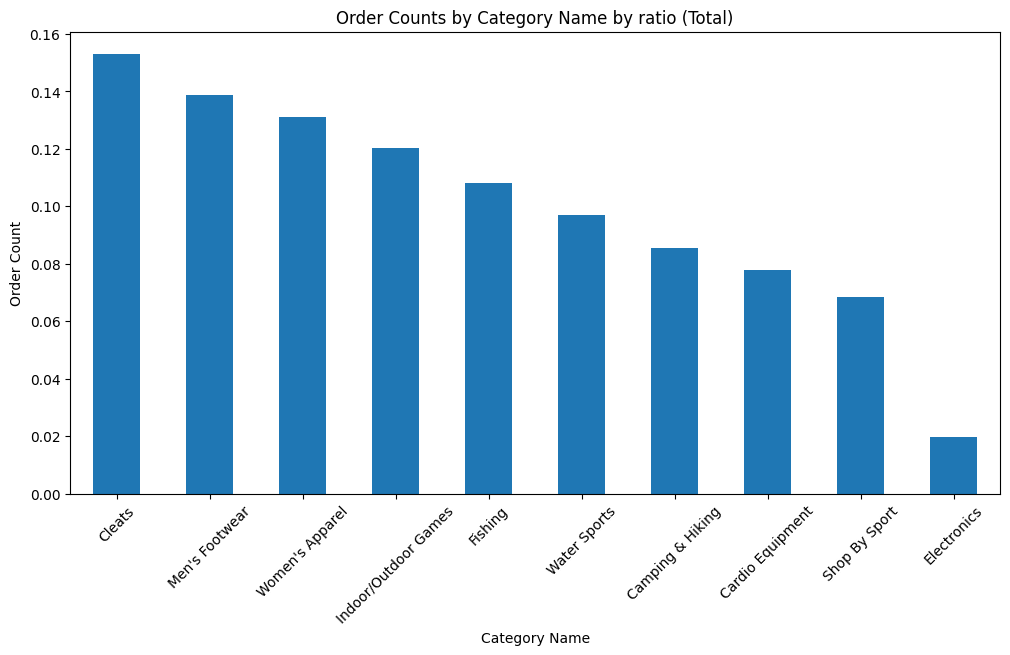

In [15]:
#카테고리별 비율
category_count_new = new_df['Category Name'].value_counts().head(10)

category_ratio = category_count_new / category_count_new.sum()
plt.figure(figsize=(12,6))
category_ratio.plot(kind='bar')
plt.title('Order Counts by Category Name by ratio (Total)')
plt.xlabel('Category Name')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()

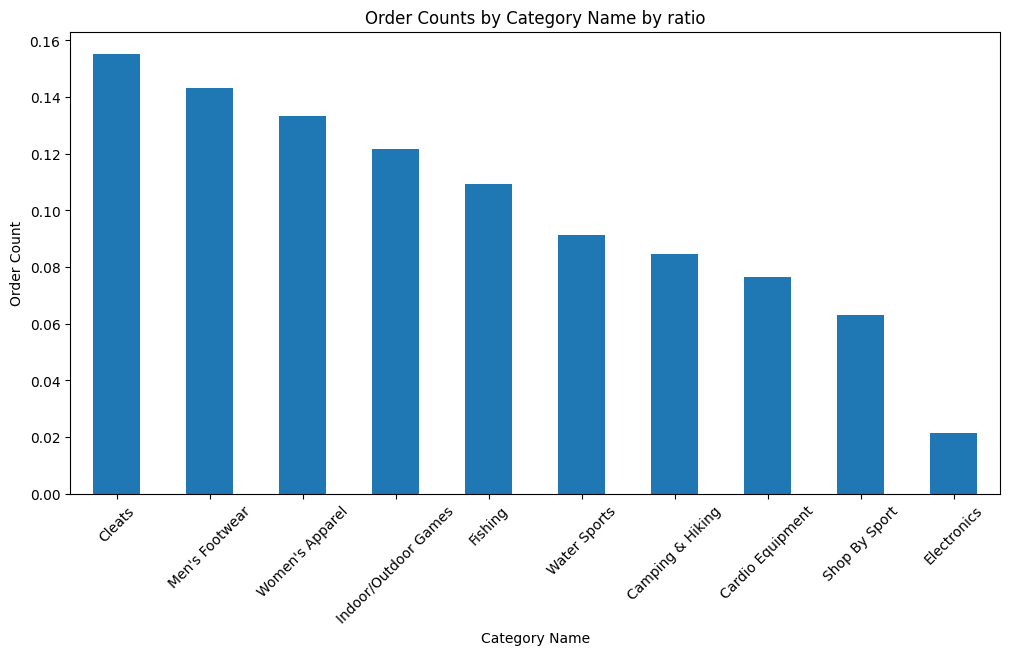

In [18]:
#카테고리별 비율
category_count = c_fraud['Category Name'].value_counts().head(10)

category_ratio = category_count / category_count.sum()
plt.figure(figsize=(12,6))
category_ratio.plot(kind='bar')
plt.title('Order Counts by Category Name by ratio')
plt.xlabel('Category Name')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()

cleats와 men's footwear는 온라인 쇼핑몰에서 가장 많이 팔리는 항목 탑2인데, 사기 의심 정황에서도 위 두 항목의 구매율이 가장 높았다.


In [19]:
new_df['Category Name'].value_counts().head(10)

Category Name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Name: count, dtype: int64

In [20]:
new_df['Order Country'].value_counts().head(10)

Order Country
Estados Unidos    24840
MÃ©xico           13172
Francia           12446
Alemania           9048
Brasil             7987
Australia          7073
Reino Unido        6866
China              4729
Italia             4687
India              3924
Name: count, dtype: int64

사기 의심 정황이 많은 나라의 1순위는, 주문량이 가장 많은 나라인 미국으로 동일했다.
그러나 주문량이 많은 나라 2순위인 멕시코는 사기 의심 정황에서는 3순위로 밀렸고, 2위는 프랑스가 차지했다.
사기 의심 정황이 많이 생기는 나라의 결제 시스템에 추가적인 보안이 요청된다.

In [17]:
c_fraud['Type'].value_counts()

Type
TRANSFER    3878
Name: count, dtype: int64

In [12]:
type_counts = c_fraud['Type'].value_counts()

# 표로 나타내기
df_type_counts = pd.DataFrame(type_counts).reset_index()
df_type_counts.columns = ['Type', 'Count']
print(df_type_counts)

       Type  Count
0  TRANSFER   3878


사기 의심 정황의 결제방식은 모두 계좌이체임을 확인했다.

In [21]:
new_df['Product Name'].value_counts().head(10)

Product Name
Perfect Fitness Perfect Rip Deck                 24515
Nike Men's CJ Elite 2 TD Football Cleat          22246
Nike Men's Dri-FIT Victory Golf Polo             21035
O'Brien Men's Neoprene Life Vest                 19298
Field & Stream Sportsman 16 Gun Fire Safe        17325
Pelican Sunstream 100 Kayak                      15500
Diamondback Women's Serene Classic Comfort Bi    13729
Nike Men's Free 5.0+ Running Shoe                12169
Under Armour Girls' Toddler Spine Surge Runni    10617
Nike Men's Comfort 2 Slide                         328
Name: count, dtype: int64

In [22]:
c_fraud['Product Name'].value_counts().head(10)

Product Name
Perfect Fitness Perfect Rip Deck                 560
Nike Men's CJ Elite 2 TD Football Cleat          516
Nike Men's Dri-FIT Victory Golf Polo             481
O'Brien Men's Neoprene Life Vest                 439
Field & Stream Sportsman 16 Gun Fire Safe        394
Pelican Sunstream 100 Kayak                      329
Diamondback Women's Serene Classic Comfort Bi    305
Nike Men's Free 5.0+ Running Shoe                267
Under Armour Girls' Toddler Spine Surge Runni    223
adidas Youth Germany Black/Red Away Match Soc     13
Name: count, dtype: int64